##Download content from wikipedia
First wikipedia library must be installed 

In [24]:

Data = pd.read_csv("JobDataTranslated.csv")
joblist = [Data["Job Description"][i] for i in range(len(Data))]
joblist

["You know better than anyone how to bind other people to you, people for whom you can mean something. A great new assignment for jobseekers and the right match for their sourcing issue for clients. If you are also curious about market developments, would you like to hear more about projects within the industry and are you able to translate this information into opportunities for Brunel, then a role as a Sales Consultant is perfect for you! About this position As a Sales Consultant you always have something to do. Your main goal is to make the best match between clients and candidates, and that involves a lot. Your work does not stop at finding and connecting both parties. You are also responsible for expanding and maintaining your own network of candidates and clients. That means that you are in constant contact with both parties. Keeping an overview and keeping different balls in the air is no problem for you. Your focus area will be on specialists and organizations within the Northe

8

##TF-IDF example

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(joblist)

In [26]:
print(vectorizer.get_feature_names())
print(X.shape)

['00', '000', '0000', '006', '007', '009', '01', '010', '0103', '011', '0118', '015', '016', '0162', '0166', '0167', '0168331390', '0174', '0182', '0183', '0184', '0186', '0192', '02', '020', '023', '024', '0243232928', '0244', '0252', '026', '03', '030', '0316', '0318', '0320', '033', '0341', '0342', '0344', '035', '036', '037', '038', '04', '040', '041', '0412', '0413', '0418', '043', '046', '047', '0475', '048', '0486', '0499', '05', '050', '0522', '0527', '053', '054', '0570', '06', '0608506', '0610508188', '0610960087', '0611770688', '0611952546', '0613343581', '0614864105', '0617', '06213', '0633793175', '0641205010', '0664000', '067', '0682455003', '0683057550', '069', '07', '070', '071', '072', '073', '076', '077', '078', '08', '085', '088', '09', '090', '095', '10', '100', '1000', '100g', '101', '1010', '102', '103', '10346035', '105', '1060', '108', '10889373', '109', '1091', '10926905', '10931340', '10948216', '10949422', '10966736', '10a', '10am', '10k', '10km', '10minimum'

In [27]:
print(X[0,])

  (0, 5418)	0.028534878249900402
  (0, 5786)	0.029880451923424475
  (0, 1398)	0.023086752293538605
  (0, 10512)	0.03929431941812332
  (0, 6729)	0.046669672036765905
  (0, 5887)	0.06058568358099307
  (0, 3332)	0.02202377895792722
  (0, 4367)	0.026741414565219807
  (0, 5145)	0.03354843452877361
  (0, 6344)	0.03548110572560208
  (0, 3603)	0.07605007765336988
  (0, 1908)	0.03884294909060996
  (0, 5263)	0.058163036443985607
  (0, 7632)	0.05156475091737873
  (0, 8852)	0.04508408531895184
  (0, 12159)	0.07343178540097635
  (0, 1468)	0.03873269489974579
  (0, 3147)	0.04565455758414668
  (0, 512)	0.0703758413422187
  (0, 5096)	0.050072390531482075
  (0, 4796)	0.051886709997122846
  (0, 2282)	0.03531458239594118
  (0, 6937)	0.03906652492439115
  (0, 10709)	0.05035646834389948
  (0, 7079)	0.050945499797978896
  :	:
  (0, 10298)	0.07198793246143963
  (0, 11006)	0.026782132141731856
  (0, 7054)	0.1400090161102977
  (0, 9523)	0.032720264205704966
  (0, 11004)	0.17088612662229943
  (0, 1304)	0.304849

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

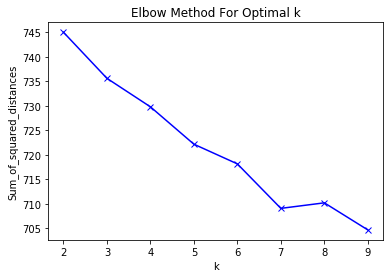

In [29]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [30]:
true_k = 9
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

Empty DataFrame
Columns: [title, cluster]
Index: []


Cluster: 0
Titles
Series([], )


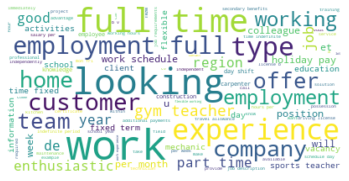

Cluster: 1
Titles
Series([], )


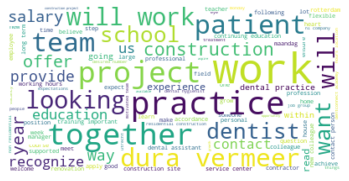

Cluster: 2
Titles
Series([], )


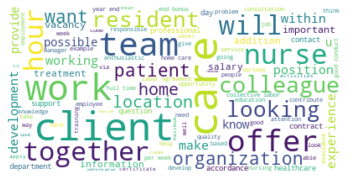

Cluster: 3
Titles
Series([], )


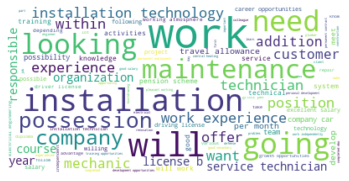

Cluster: 4
Titles
Series([], )


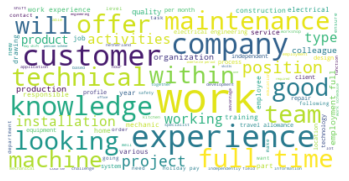

Cluster: 5
Titles
Series([], )


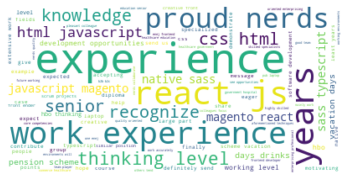

Cluster: 6
Titles
Series([], )


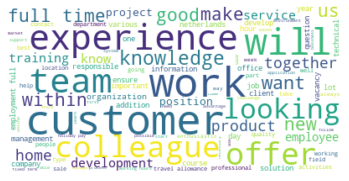

Cluster: 7
Titles
Series([], )


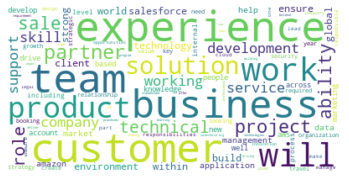

Cluster: 8
Titles
Series([], )


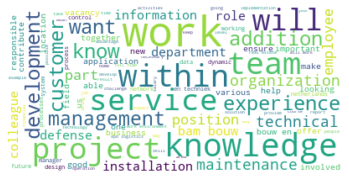

In [31]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':joblist}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()